In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statistics
from scipy.stats import mannwhitneyu

### Загружаем данные

In [7]:
item = 'lending_club' # Выбрать из поля Item для вашего датасета
package = 'modeldata' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,funded_amnt,term,int_rate,sub_grade,addr_state,verification_status,annual_inc,emp_length,delinq_2yrs,inq_last_6mths,...,open_il_12m,open_il_24m,total_bal_il,all_util,inq_fi,inq_last_12m,delinq_amnt,num_il_tl,total_il_high_credit_limit,Class
0,16100,term_36,13.99,C4,CT,Not_Verified,35000.0,emp_5,0,0,...,0,0,1099,48,0,3,0,3,13193,good
1,32000,term_60,11.99,C1,MN,Verified,72000.0,emp_ge_10,0,0,...,1,3,49187,77,0,0,0,9,65945,good
2,10000,term_36,16.29,D1,OH,Source_Verified,72000.0,emp_ge_10,0,2,...,2,3,33378,79,1,4,0,9,39387,good
3,16800,term_60,13.67,C3,NV,Verified,101000.0,emp_lt_1,0,0,...,1,2,55445,64,1,4,0,10,60188,good
4,3500,term_36,7.39,A4,CA,Source_Verified,50100.0,emp_unk,0,0,...,0,0,0,78,0,0,0,3,0,good


In [9]:
# Так как данные о верификации имеют значения одинаковые по смыслу, заменяем Source_Verified на Verified

In [11]:
def ver(x):
    if x == 'Source_Verified':
        return 'Verified'
    else:
        return x

In [13]:
df['verification_status'] = df['verification_status'].map(ver)

In [15]:
df

,funded_amnt,term,int_rate,sub_grade,addr_state,verification_status,annual_inc,emp_length,delinq_2yrs,inq_last_6mths,...,open_il_12m,open_il_24m,total_bal_il,all_util,inq_fi,inq_last_12m,delinq_amnt,num_il_tl,total_il_high_credit_limit,Class
0,16100,term_36,13.99,C4,CT,Not_Verified,35000.0,emp_5,0,0,...,0,0,1099,48,0,3,0,3,13193,good
1,32000,term_60,11.99,C1,MN,Verified,72000.0,emp_ge_10,0,0,...,1,3,49187,77,0,0,0,9,65945,good
2,10000,term_36,16.29,D1,OH,Verified,72000.0,emp_ge_10,0,2,...,2,3,33378,79,1,4,0,9,39387,good
3,16800,term_60,13.67,C3,NV,Verified,101000.0,emp_lt_1,0,0,...,1,2,55445,64,1,4,0,10,60188,good
4,3500,term_36,7.39,A4,CA,Verified,50100.0,emp_unk,0,0,...,0,0,0,78,0,0,0,3,0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,3025,term_36,13.67,C3,GA,Not_Verified,43000.0,emp_ge_10,0,0,...,0,0,0,67,0,0,0,0,0,good
9853,16000,term_60,16.59,D2,OR,Not_Verified,32000.0,emp_3,0,1,...,0,1,12519,40,2,2,0,2,15051,good
9854,3000,term_36,9.16,B2,NY,Verified,18000.0,emp_lt_1,0,0,...,0,1,1109,73,0,0,0,2,1800,good
9855,35000,term_36,7.89,A5,OH,Verified,240000.0,emp_ge_10,1,1,...,0,0,0,70,0,2,0,6,0,good


### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

In [19]:
df.isna().sum()

funded_amnt                   0
term                          0
int_rate                      0
sub_grade                     0
addr_state                    0
verification_status           0
annual_inc                    0
emp_length                    0
delinq_2yrs                   0
inq_last_6mths                0
revol_util                    0
acc_now_delinq                0
open_il_6m                    0
open_il_12m                   0
open_il_24m                   0
total_bal_il                  0
all_util                      0
inq_fi                        0
inq_last_12m                  0
delinq_amnt                   0
num_il_tl                     0
total_il_high_credit_limit    0
Class                         0
dtype: int64

In [21]:
# Датасет без пропусков

# 1. Рассмотрим гепотезу 2-х категориальных переменных:
### Верифицированые кредиты чаще погашены чем не погашены.

In [264]:
df_hi = pd.crosstab(df['verification_status'], df['Class'], rownames=['verification_status'], colnames=['Class'])

In [266]:
df_hi

Class,bad,good
verification_status,,
Not_Verified,118,3316
Verified,399,6024


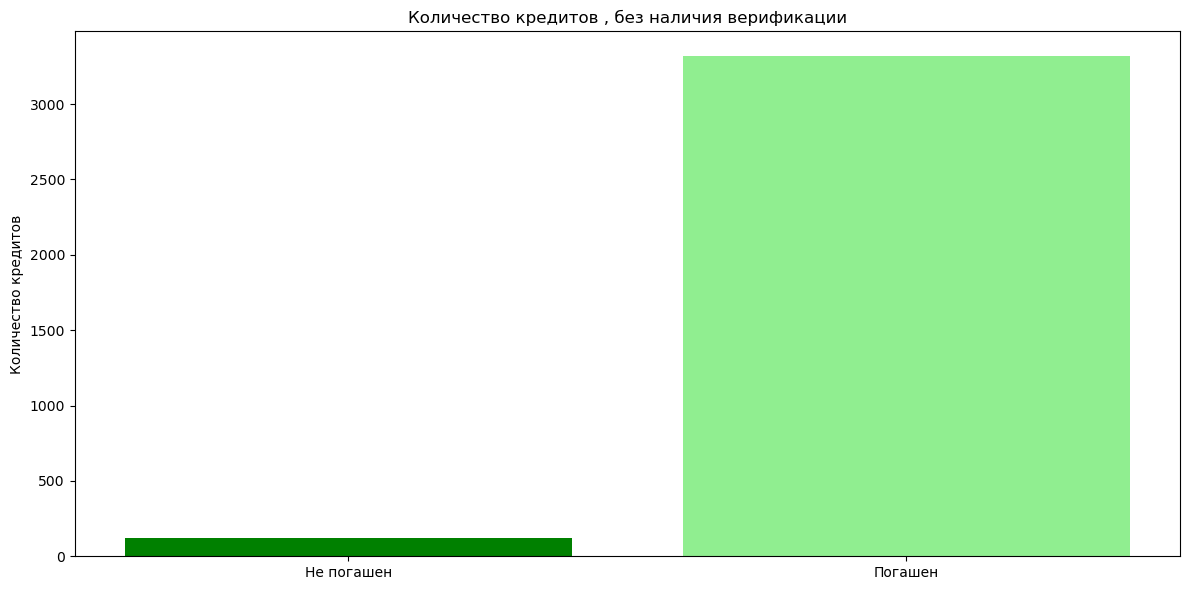

In [92]:
#пересечение переменных Verified и good, для подсчета колличества верифицированых кредитов и нет
#распределение не верифицированых кредитов
df_hi = pd.crosstab(df['verification_status'], df['Class'], rownames=['verification_status'], colnames=['Class'])
fig, ft = plt.subplots(1, 1, figsize=(12, 6))
ft.bar(['Не погашен', 'Погашен'], df_hi.iloc[0], color=['green', 'lightgreen'])
ft.set_title('Количество кредитов , без наличия верификации')
ft.set_ylabel('Количество кредитов')
plt.tight_layout()
plt.show()

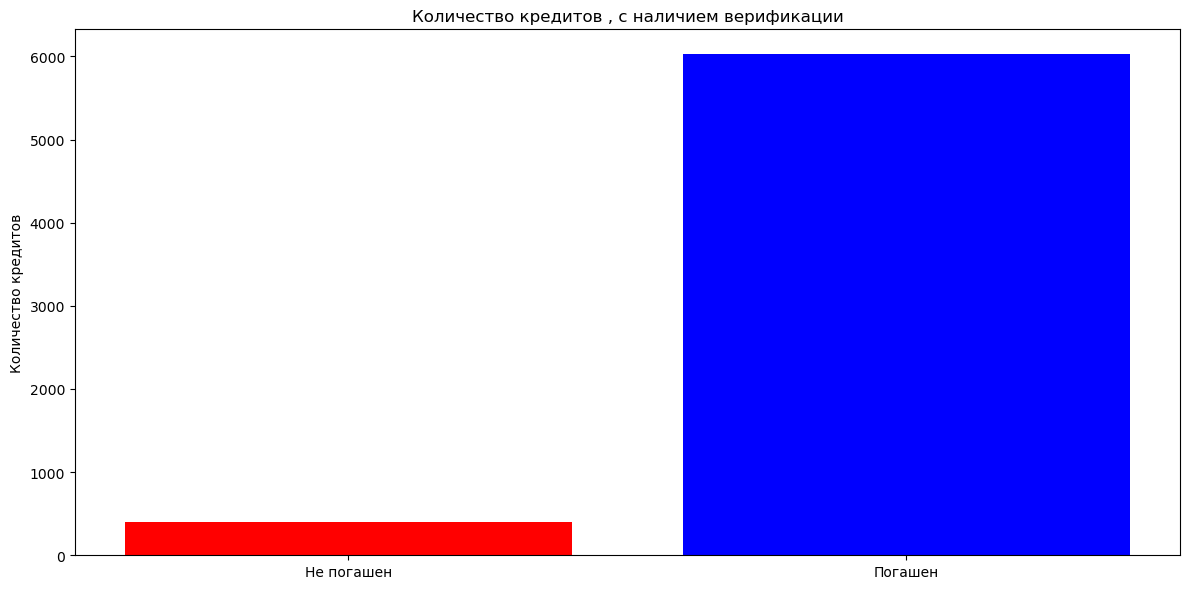

In [94]:
#распределение верифицированых кредитов
df_hi = pd.crosstab(df['verification_status'], df['Class'], rownames=['verification_status'], colnames=['Class'])
fig, lt = plt.subplots(1, 1, figsize=(12, 6))
lt.bar(['Не погашен', 'Погашен'], df_hi.iloc[1], color=['red', 'blue'])
lt.set_title('Количество кредитов , c наличием верификации')
lt.set_ylabel('Количество кредитов')
plt.tight_layout()
plt.show()

### Возможно кредиты верифицированые чаще погашенны, чем кредиты не верифицированы.

### Тест ХИ-квадрат

In [98]:
print('statistic =',stats.chi2_contingency(df_hi).statistic,'pvalue =',stats.chi2_contingency(df_hi).pvalue)
alpha = 0.05
print(np.where(stats.chi2_contingency(df_hi).pvalue < alpha , "Отвергаем нулевую гипотезу: что переменные verification_status и Class независимы", "Не отвергаем нулевую гипотезу: что переменныеverification_status и Class зависимы"))

statistic = 34.135738018849636 pvalue = 5.139856947498245e-09
Отвергаем нулевую гипотезу: что переменные verification_status и Class независимы


In [100]:
# Гипотеза отвергается, а это значит, что верифицированые кредиты чаще погашены.

# 2.Рассмотрим гипотезу категориальной и числовой переменной:
### Распределение суммы кредита по погашению либо не погашению близкое к равному.

In [103]:
# Проверяем выбросы

In [105]:
df['total_il_high_credit_limit'].describe()

count      9857.000000
mean      45400.748808
std       45103.207761
min           0.000000
25%       16300.000000
50%       34375.000000
75%       60786.000000
max      554119.000000
Name: total_il_high_credit_limit, dtype: float64

In [107]:
q1 = df['total_il_high_credit_limit'].quantile(0.25)
q3 = df['total_il_high_credit_limit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Выбросами будут считаться все кредиты, у которых сумма находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все кредиты, у которых сумма находится за пределами интервала [-50429.0, 127515.0]


In [109]:
df_new = df[(df['total_il_high_credit_limit']>=lower_bound)&(df['total_il_high_credit_limit']<=upper_bound)]

In [111]:
# Из статуса кредита и суммы кредита выделим две группы погашен и не погашен.

In [113]:
df['Class'].unique()

array(['good', 'bad'], dtype=object)

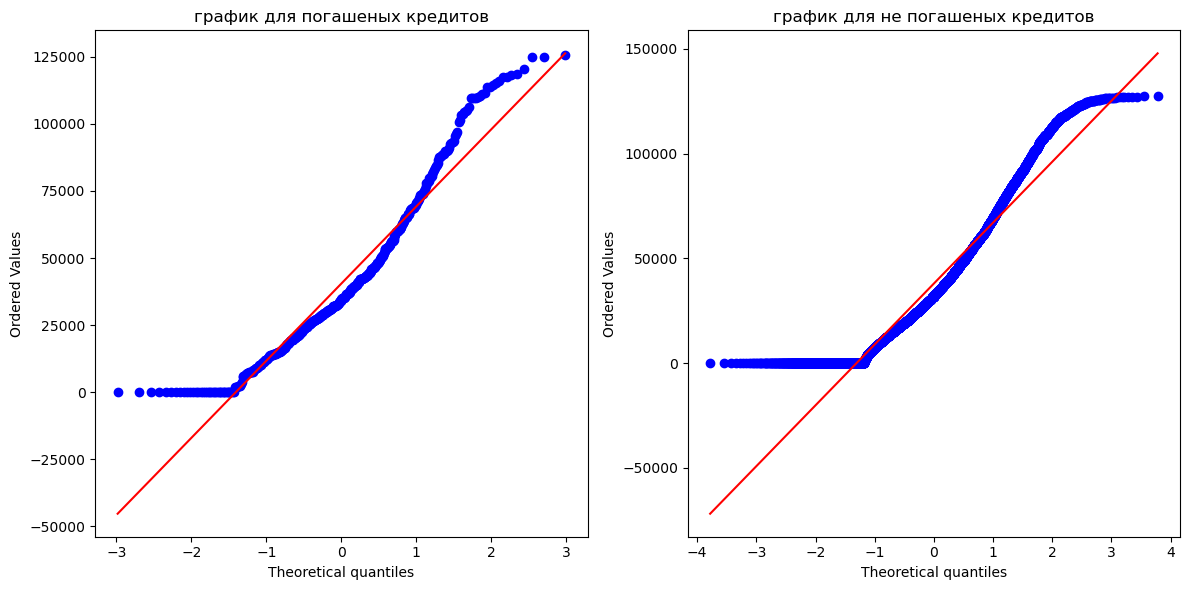

In [115]:
badly = df_new[df_new['Class'] == 'bad']['total_il_high_credit_limit']
good = df_new[df_new['Class'] == 'good']['total_il_high_credit_limit']
#проверка на нормальность распределение перменных
plt.figure(figsize=(12, 6))
#график для погашеных кредитов
plt.subplot(1, 2, 1)
stats.probplot(badly, dist="norm", plot=plt)
plt.title('график для погашеных кредитов')
#график для не погашеных кредитов
plt.subplot(1, 2, 2)
stats.probplot(good, dist="norm", plot=plt)
plt.title('график для не погашеных кредитов')
plt.tight_layout()
plt.show()

### Тест Шапиро-Уилка для проверки на нормальное распределение

In [118]:
alpha = 0.05
print(np.where( stats.shapiro(badly).pvalue<alpha,'для переменной badly отвергаем нулевую гипотезу: распределение не соответствует нормальному', 'для переменной badly не отвергаем нулевую гипотезу: распределение нормальное'))
print(np.where( stats.shapiro(good).pvalue<alpha,'для переменной good отвергаем нулевую гипотезу: распределение не соответствует нормальному', 'для переменной good не отвергаем нулевую гипотезу: распределение нормальное'))


для переменной badly отвергаем нулевую гипотезу: распределение не соответствует нормальному
для переменной good отвергаем нулевую гипотезу: распределение не соответствует нормальному


### Тест Манна-Уитни для проверки гипотезы: Распределение суммы кредита по погашению либо не погашению близкое к равному.

In [121]:
print(np.where(stats.mannwhitneyu(badly, good, alternative='two-sided').pvalue<alpha,'Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.','Не можем отвергнуть нулевую гипотезу: нет статистически значимой разницы между группами.'))

Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.


In [123]:
#сравниваем медианы

In [125]:
print(np.where(badly.median()<good.median(),'Не погашенные кредиты имеют меньшую сумму кредитного портфеля', 'Погашенные кредиты имеют меньшую сумму кредитного портфеля'))

Погашенные кредиты имеют меньшую сумму кредитного портфеля


### Распределение между двумя группами (погашенными и не погашенными по сумме кредитного портфеля) имеет различия. Есть вероятность, что кредиты с меньшей суммой чаще гасят, чем кредиты с большей суммой.

# 3. Рассмотрим гипотезу 2-х числовых переменных:
### Чем больше сумма кредита тем больше прирост кредитного портфеля.

In [129]:
df[['total_il_high_credit_limit', 'annual_inc']].describe()

,total_il_high_credit_limit,annual_inc
count,9857.000000,9857.000000
mean,45400.748808,80320.356320
std,45103.207761,53450.165834
min,0.000000,0.000000
25%,16300.000000,50000.000000
50%,34375.000000,68900.000000
75%,60786.000000,96000.000000
max,554119.000000,960000.000000


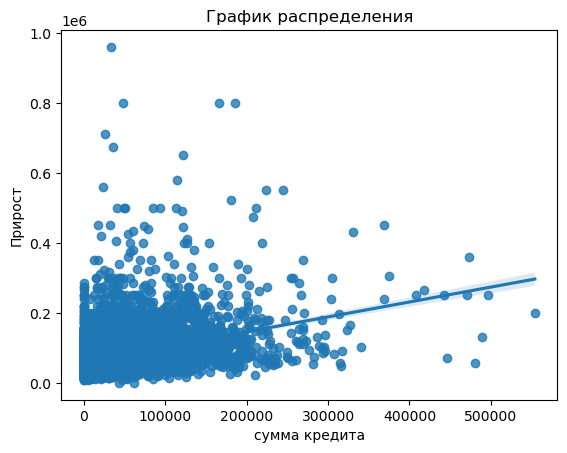

In [131]:
sns.regplot(data=df, x='total_il_high_credit_limit', y='annual_inc')
plt.title('График распределения')
plt.xlabel('сумма кредита')
plt.ylabel('Прирост')
plt.show()

In [133]:
# Очистка от выбросов

In [135]:
q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lowr_bound_exclaim_mess = round((q1 - 1.5*iqr),2)
upper_bound_exclaim_mess = round((q3 + 1.5*iqr),2)
print (f'Выбросами будут считаться суммы прироста, у которых сумма находится за пределами интервала [{lowr_bound_exclaim_mess},{upper_bound_exclaim_mess}]')

Выбросами будут считаться суммы прироста, у которых сумма находится за пределами интервала [-19000.0,165000.0]


In [137]:
df_clean=df[(df['annual_inc']>=lowr_bound_exclaim_mess)&(df['annual_inc']<=upper_bound_exclaim_mess)]
# очищенные данные
df_clean.shape

(9360, 23)

In [139]:
#Определяем интервал для выбросов для переменной annual_inc
q1 = df['total_il_high_credit_limit'].quantile(0.25)
q3 = df['total_il_high_credit_limit'].quantile(0.75)
iqr = q3 - q1
lowr_bound_num_char = round((q1 - 1.5*iqr),2)
upper_bound_num_char = round((q3 + 1.5*iqr),2)
print (f'Выбросами будут считаться все кредиты, в которых сумма кредита находится за пределами интервала [{lowr_bound_num_char},{upper_bound_num_char}]')

Выбросами будут считаться все кредиты, в которых сумма кредита находится за пределами интервала [-50429.0,127515.0]


In [141]:
df_clean=df[(df['total_il_high_credit_limit']>=lowr_bound_num_char)&(df['total_il_high_credit_limit']<=upper_bound_num_char)]
# очищенные данные
df_clean.shape

(9357, 23)

### Корреляция Пирсона между суммой кредита и суммой прироста:

In [144]:
alpha = 0.05
print(np.where(stats.pearsonr(df_clean['total_il_high_credit_limit'], df_clean['annual_inc']).pvalue<alpha,'отвергаем нулевую гипотезу: подтверждаем наличие статистически значимой связи между суммой кредита и приростом', 'не отвергаем нулевую гипотезу: отвергаем наличие статистически значимой связи между суммой кредита и приростом'))

отвергаем нулевую гипотезу: подтверждаем наличие статистически значимой связи между суммой кредита и приростом


In [146]:
print(' Коэффициент корреляции',stats.pearsonr(df_clean['total_il_high_credit_limit'], df_clean['annual_inc']).statistic, 'показывает умеренную положительную связь между суммой кредита и приростом')

 Коэффициент корреляции 0.29630140318292286 показывает умеренную положительную связь между суммой кредита и приростом


## Существует статистически значимая умеренная положительная связь между суммой кредита и приростом кредитного портфеля. 
## Вероятней всего можно утверждать чем больше сумма кредита, тем больше прирост кредитного прироста.